# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix, the world's leading online streaming platform, boasts over 220 million subscribers as of Q2 2022. To enhance user experience and minimize subscriber churn, it is essential to organize the shows on their platform into well-defined clusters.

By clustering shows, we can gain insights into their similarities and differences. These clusters can then be used to provide personalized show recommendations, tailored to the preferences of individual users.

The primary objective of this project is to categorize Netflix shows into distinct clusters, ensuring that shows within the same cluster are similar, while those in different clusters are significantly dissimilar.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [763]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab') # for tokenization
nltk.download('averaged_perceptron_tagger_eng') # Part-of-Speech (POS) tagging in NLP. It helps label words in a sentence as nouns, verbs, adjectives, etc.
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Dataset Loading

In [764]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AlmaBetter Project/M6-Project/Netflix Movies -Tv Shows Dataset.csv'

df_netflix = pd.read_csv(file_path,index_col='show_id')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [765]:
# Dataset First Look
df_netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [766]:
# Dataset Rows & Columns count
df_netflix.shape

(7787, 11)

The dataset contains 7787 records and 11 attributes.

### Dataset Information

In [767]:
# Dataset Info
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


#### Duplicate Values

In [768]:
# Dataset Duplicate Value Count
df_netflix.duplicated().value_counts()

,count
False,7787


There are no duplicated records in the dataset.

#### Missing Values/Null Values

In [769]:
# Missing Values/Null Values Count
df_netflix.isnull().sum()

,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0
listed_in,0


There are many missing values in director, cast, country, date_added, and rating columns.

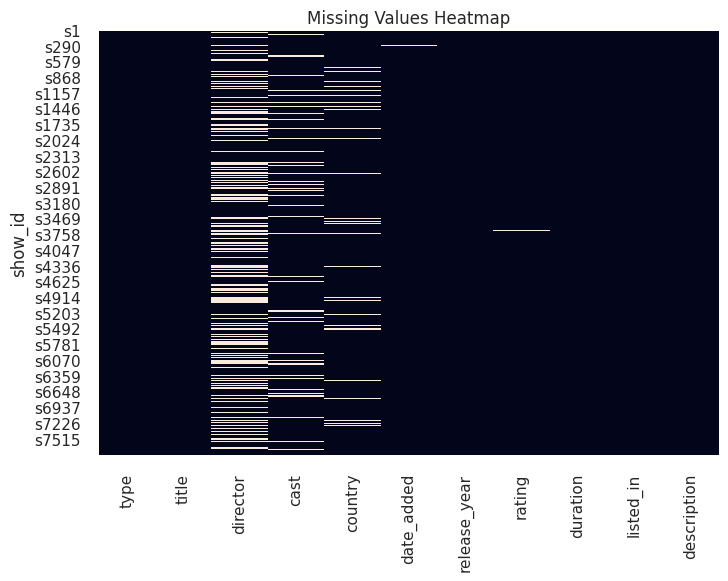

In [770]:
# Visualizing the missing values
# plt.figure(figsize=(10, 6))
sns.heatmap(df_netflix.isnull(), cbar=False,)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

* The Netflix dataset consists of tv shows and movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [771]:
# Dataset Columns
df_netflix.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [772]:
# Dataset Describe
df_netflix.describe(include= 'all').round(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7787.00,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.93,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.00,NaN,NaN,NaN,NaN


### Variables Description

* show_id : Unique ID for every Movie Or TV Show
* type : Identifier - Movie Or TV Show
* title : Title of the Movie/Show
* director : Director of the Movie/Show
* cast : Actors involved in the Movie/Show
* country : Country where the Movie/Show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Release year of the Movie/Show
* rating : TV Rating of the Movie/Show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description : The Summary description

### Check Unique Values for each variable.

In [773]:
# Check Unique Values for each variable.
df_netflix.nunique()

,0
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216
listed_in,492


* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [774]:
# Before doing any data wrangling lets create copy of the dataset
data = df_netflix.copy()

In [775]:
# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Not available')


In [776]:
# Filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
data['country'] = data['country'].fillna(value='Not Known')

In [777]:
# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, i have dropping the same
data = data.dropna(subset=['date_added','rating'])

In [778]:
# Since director have many null values if we drop them, we loss a lot data so, i replacing them with unknown.
data['director'] = data['director'].fillna(value='Unknown')

In [779]:
# Checking missing values again for confirmation
data.isna().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


What all manipulations have you done and insights you found?

To make the data analysis ready i have done the following:

1. Filled missing values of cast with Not available.
2. Filled missing values of country with Not Known.
3. Dropped rows of date_added missing values.
4. Dropped rows of ratings missing values.
5. Dropped the entire column of director as it had much number of missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

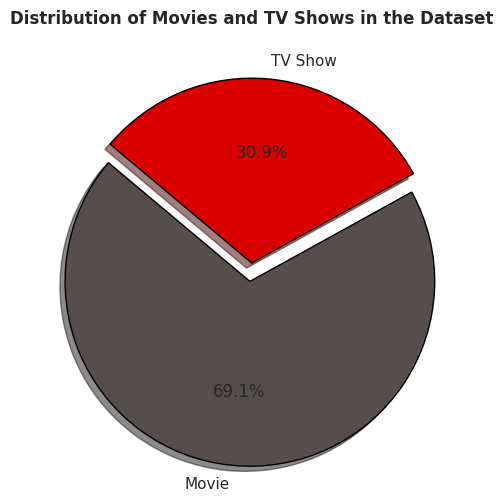

In [780]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
# type_counts =

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['#564d4d', '#db0000']  # Define custom colors
explode = (0.1, 0)  # Explode the first slice for emphasis

plt.pie(
    data['type'].value_counts(),
    labels=data['type'].value_counts().index,
    autopct='%1.1f%%',  # Display percentage
    startangle=140,  # Rotate for better visibility
    colors=colors,
    explode=explode,
    shadow=True,  # Add shadow for effect
    wedgeprops={'edgecolor': 'black'}  # Add border to slices
)

# Add a title
plt.title('Distribution of Movies and TV Shows in the Dataset', weight='bold')

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart effectively shows the proportional distribution of Movies and TV Shows, making it easy to compare their relative sizes.

##### 2. What is/are the insight(s) found from the chart?

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:
Yes, the insights can guide content strategy, focusing on dominant categories (Movies) while improving underrepresented ones (TV Shows) to attract a diverse audience and enhance subscriber retention.
* Negative Growth:
An imbalance, such as too few TV Shows, risks alienating binge-watchers and losing viewers to competitors. Balancing content offerings ensures broader appeal and sustainable growth.

#### Chart - 2

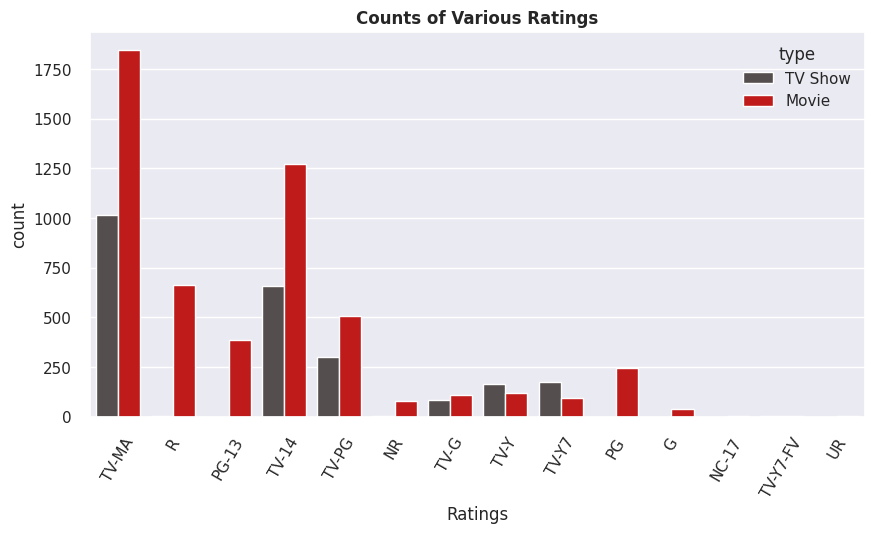

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [781]:
# Chart - 2 visualization code
# Distribution of Various Ratings

plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data, palette=['#564d4d', '#db0000'])

# Set Labels
plt.title('Counts of Various Ratings',weight='bold')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.

#### Chart - 3

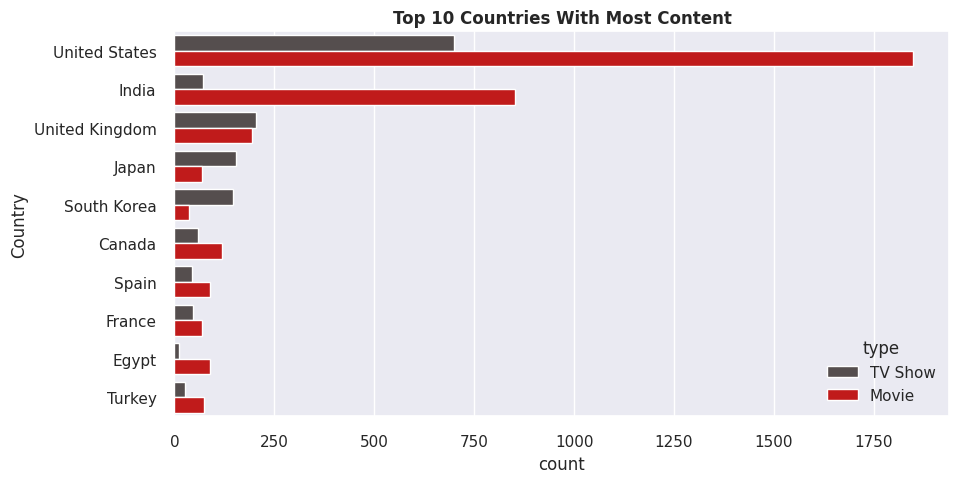

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1847
         India              852
         United Kingdom     193
         Canada             118
         Egypt               89
         Spain               89
         Turkey              73
         Philippines         70
         France              69
         Japan               69
TV Show  United States      699
         United Kingdom     203
         Japan              155
         South Korea        147
         India               71
         Taiwan              68
         Canada              59
         France              46
         Spain               45
         Australia           44
Name: count, dtype: int64


In [782]:
# Chart - 3 visualization code
# Top 10 Countries with Most Content

# Remove Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#564d4d', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top 10 Countries With Most Content',weight='bold')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:

* The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.
* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.
* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### Chart - 4

In [783]:
# Seprate dataframe for movie and tv show release

release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index()
show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index()

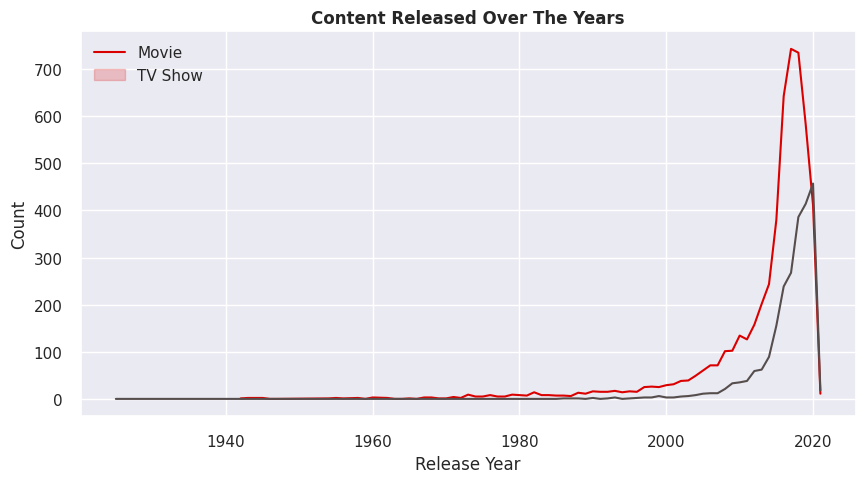

In [784]:
# Chart - 4 visualization code
# Content Released Over The Years

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = movie_year, x='release_year', y='count', color = '#db0000')
sns.lineplot(data = show_year, x='release_year', y='count', color = '#564d4d')

# Set Labels
plt.title('Content Released Over The Years',weight='bold')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()


In [785]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            742
         2018            734
         2016            642
         2019            582
         2020            411
         2015            380
         2014            244
         2013            202
         2012            158
         2010            135
TV Show  2020            457
         2019            414
         2018            386
         2017            268
         2016            239
         2015            156
         2014             90
         2013             63
         2012             60
         2011             39
Name: count, dtype: int64


##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years i have used line plot here.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

1. Growth in the number of movies on Netflix is much higher than tv shows.
2. Most of the content available was released between 2010 and 2020.
3. The highest number of movies got released in 2017 and 2018 and tv shows got
   released in 2019 and 2020.
4. The line plot shows very few movies, and tv shows got released before the   year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### Chart - 5

In [786]:
# Extracting Month from date_added Column
data['month_added'] = pd.DatetimeIndex(data['date_added']).month

In [787]:
# Create DataFrame To Store Month Values and Counts
months_df = data.month_added.value_counts().to_frame().reset_index()
months_df.columns = ['month', 'count']
months_df

,month,count
0,12,832
1,10,785
2,1,756
3,11,738
4,3,668
5,9,618
6,8,617
7,7,600
8,4,600
9,5,543


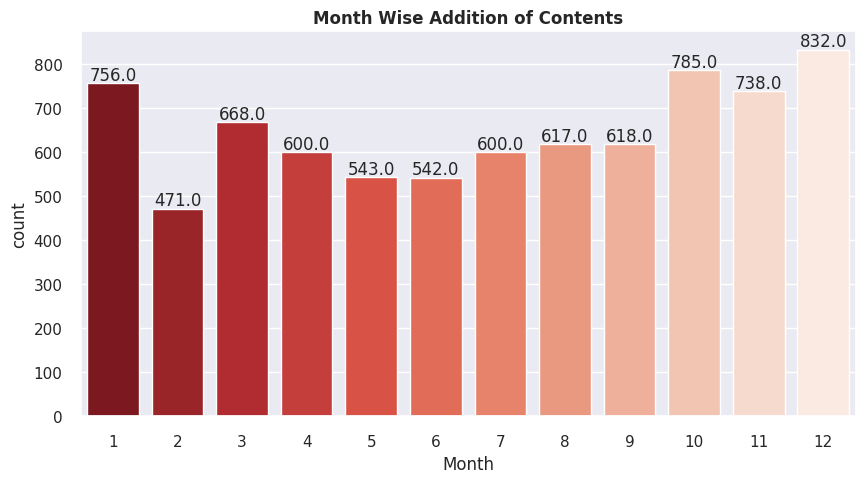

In [788]:
# Chart - 5 visualization code
# Content Added Over The Months

plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month', y='count', palette='Reds_r')

# Set Labels
plt.title('Month Wise Addition of Contents',weight='bold')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

* October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
* It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### Chart - 6

In [789]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

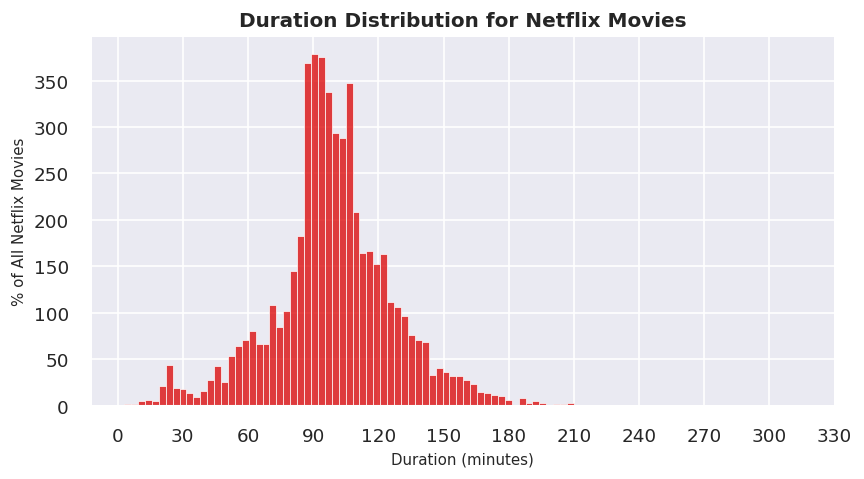

In [790]:
# Chart - 6 visualization code
# Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies",weight='bold')
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.


* On netflix most of the movies last for 90 to 120 minutes.
* So for target audience, movies duration will be greater than minimum 90 minutes.

#### Chart - 7

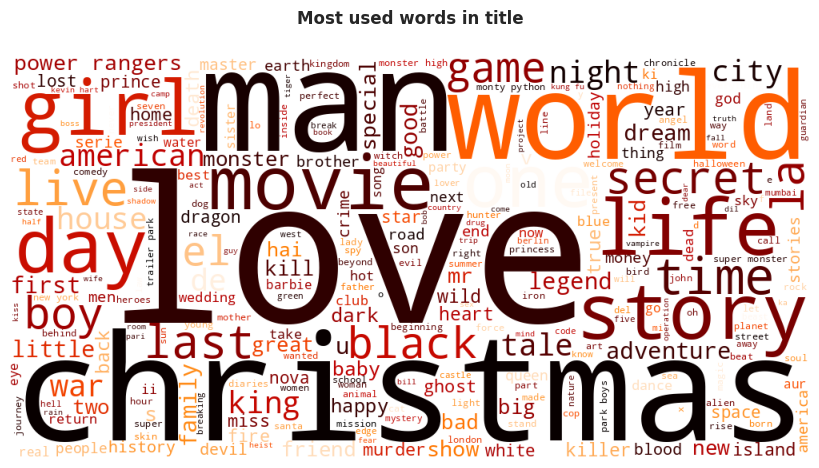

In [791]:
# Chart - 7 visualization code
# WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in data.title:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# set parameter
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', pad=25,weight='bold')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

##### 2. What is/are the insight(s) found from the chart?

* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The insights that show a high count of movies added to Netflix at the start and end of the year, as well as a high count of TV shows added in December, can inform strategic content acquisition decisions, leading to increased user engagement and subscriber retention.

#### Chart - 8

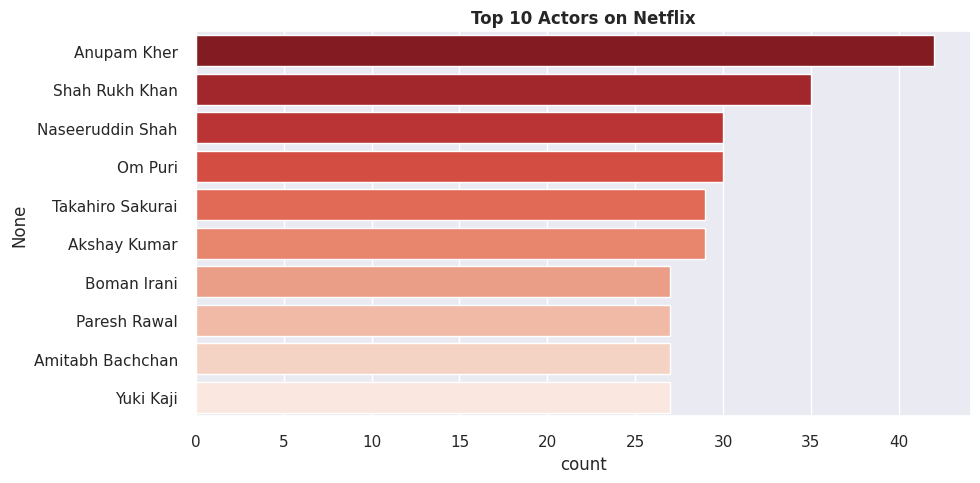

In [792]:
# Chart - 8 visualization code
# Top 10 Genres on Netflix
actor = data[data.cast != 'Not available'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Resetting index to avoid duplicate labels before plotting
actor = actor.reset_index(drop=True)

# Set Labels and Ploting Graph for Top 10 Actors
plt.figure(figsize=(10,5))
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Actors on Netflix',weight='bold')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

That the actors in the top ten list of most numbers tv shows and movies are from India.
Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.

#### Chart - 9

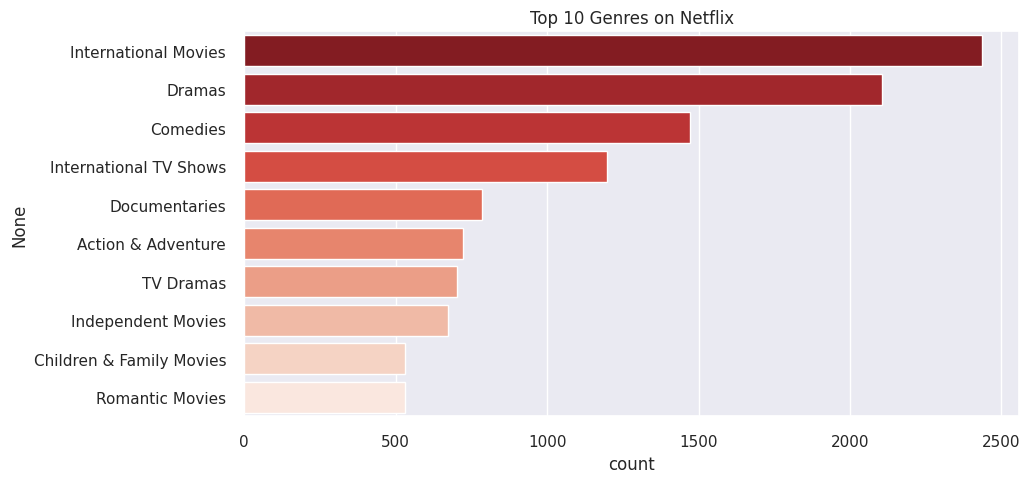

In [793]:

# Chart - 9 Count Plot Visualization Code for Top 10 Genres on Netflix
# Separating Genres
genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

genres = genres.reset_index(drop=True)
# Set Labels and Ploting Graph for Top 10 Genres
plt.figure(figsize=(10,5))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10], palette = "Reds_r")
plt.title('Top 10 Genres on Netflix')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### Chart - 10 - Correlation Heatmap

In [794]:
# Drop Temporary Required month_added Column First
data = data.drop(['date_added'], axis=1)
# date_added

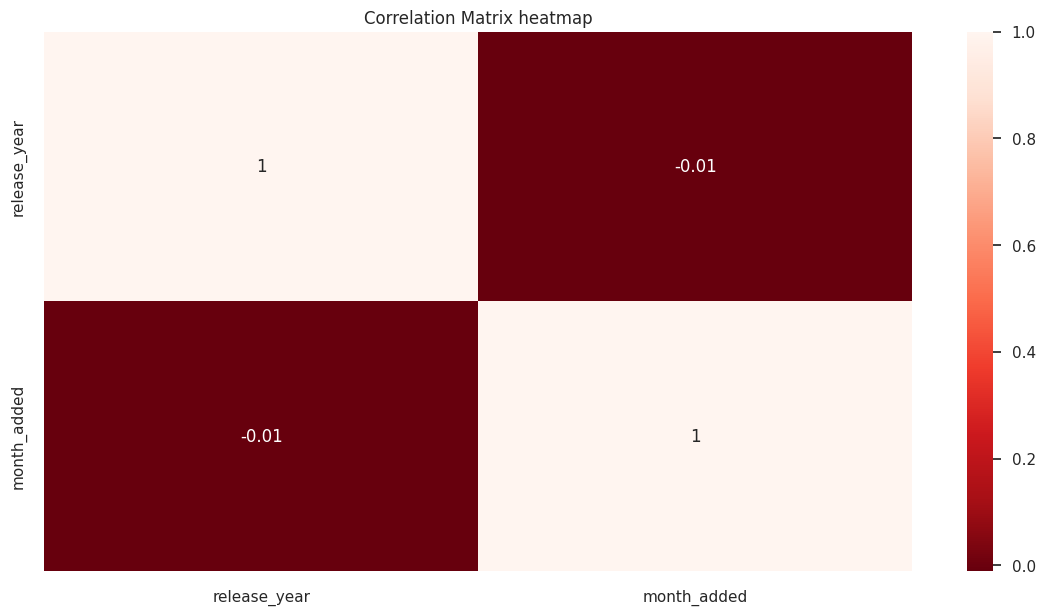

In [795]:
# Chart - 10 Correlation Heatmap Visualization Code
corr_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation

# Plot Heatmap
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap.

#### Chart - 15 - Pair Plot

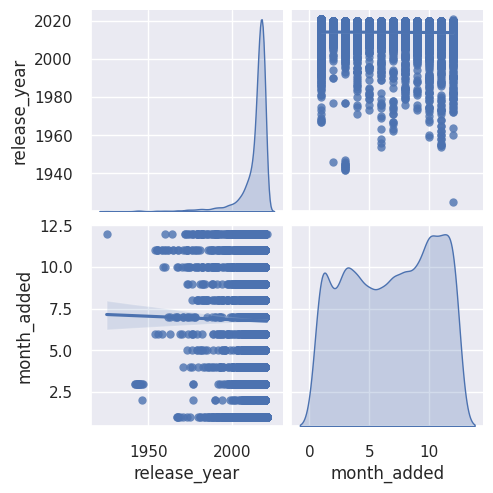

In [796]:
# Pair Plot visualization code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

q1. Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.
2. The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{united states} = μ_{india}$

Alternate hypothesis: $H_1 : μ_{united states} \neq μ_{india}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [797]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies['country']=='United States']
in_movie_df = df_movies[df_movies['country']=='India']

In [798]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat,p_value = scipy.stats.ttest_ind(us_movie_df['release_year'], in_movie_df['release_year'],equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t-statistic: 2.6591816958277716
p-value: 0.007901561023488638
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

Null hypothesis:  Ho:μmovie=μtvshow

Alternate hypothesis:  H1:μmovie≠μtvshow

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [799]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
num_movies = data[data['type'] == 'Movie'].count()['type']
num_tv_shows = data[data['type'] == 'TV Show'].count()['type']
print(f"Number of movies: {num_movies}")
print(f"Number of TV shows: {num_tv_shows}")

Number of movies: 5372
Number of TV shows: 2398


In [800]:
# set the count and sizes for the z-test
counts = [num_movies, num_tv_shows] # Number of movies and TV shows
sizes = [len(data),len(data)]

z_stat,p_value = proportions_ztest(counts, sizes,value=0, alternative='larger')
print("z-statistic:", z_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")


z-statistic: 47.71395895355864
p-value: 0.0
Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [801]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sum()

0

No Null Values found.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers

Most of the columns are categorical, Only One Numeric Column (release_year)

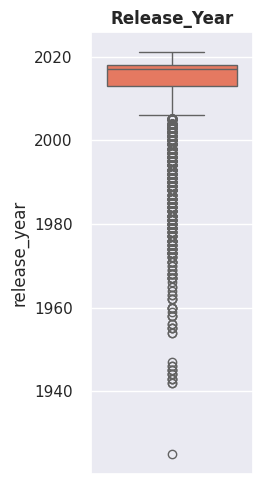

In [802]:
# Handling Outliers & Outlier treatments
numeric_features=["release_year"]
plt.figure(figsize=(10,5))
for i,column in enumerate(numeric_features):
  plt.subplot(1,5,i+1)
  sns.boxplot(data[column],palette="Reds_r")
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


### 3. Categorical Encoding

No need as the data is categorical

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [803]:
# Expand Contraction
# Create a new column called 'new' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['new'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']


In [804]:
# Cross checking our result for the function created
print(data['new'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi

#### 2. Lower Casing

In [805]:
# Lower Casing
# Define a function to convert text into lower cases
def lower_case(text):
    text = text.lower()
    return text

# Apply the to_lower() function to the 'new' column of the DataFrame
data['new'] = data['new'].apply(lower_case)

# checking our result for the function created
print(data['new'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi

#### 3. Removing Punctuations

In [806]:
# Remove Punctuations
# Define a function to remove punctuations from text
import re # Import the re module
def remove_punctuations(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['new'] = data['new'].apply(remove_punctuations)
# check our result that the function worked as expected
print(data['new'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi

#### 4. Removing URLs & Removing words and digits contain digits.

In [807]:
# Remove URLs & Remove words and digits contain digits
# 'new' column does not have any URLs so remove words and digits containing digits
data['new'] = data['new'].str.replace(r'\w*\d\w*', '', regex=True)

# check our result for the function created
print(data['new'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [808]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['new'] = data['new'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['new'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [809]:
# Remove White spaces
data['new'] = data['new'].str.strip()

# check our result for the function created
print(data['new'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text

In [810]:
# Rephrase Text

# Rephrasing can be achived by the following code

def rephrase_tags(x):
    return x.replace('awsome', 'fantastic')
data['new'] = data['new'].apply(rephrase_tags)

# check our result for the function created
print(data['new'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 7. Tokenization

In [811]:
# Tokenization

# Apply the tokenization to the 'new' column of the DataFrame
data['new'] = data['new'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(data['new'][0])

# Store this list form of 'new' column as 'temp_new' for later POS tagging purpose
temp_new = data['new']

['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', 'saved', 'squalor', 'tvma', 'brazil', 'international', 'tv', 'shows', 'tv', 'dramas', 'tv', 'scifi', 'fantasy', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi']


#### 8. Text Normalization

In [812]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'new' column of the DataFrame
data['new'] = data['new'].apply(stemming)

# check our result for the function created
print(data['new'][0])

futur elit inhabit island paradis far crowd slum get one chanc join save squalor tvma brazil intern tv show tv drama tv scifi fantasi joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi


##### Which text normalization technique have you used and why?

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Stemming is important in natural language processing(NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

#### 9. Part of speech tagging

In [813]:
# POS Taging

# Apply the pos tagging to the 'tags' column of the DataFrame
data['new'] = temp_new.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(data['new'][0])

[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


[('future', 'JJ'), ('elite', 'JJ'), ('inhabit', 'NN'), ('island', 'NN'), ('paradise', 'NN'), ('far', 'RB'), ('crowded', 'VBD'), ('slums', 'NNS'), ('get', 'VBP'), ('one', 'CD'), ('chance', 'NN'), ('join', 'NN'), ('saved', 'VBD'), ('squalor', 'JJ'), ('tvma', 'NN'), ('brazil', 'VBD'), ('international', 'JJ'), ('tv', 'NN'), ('shows', 'NNS'), ('tv', 'NN'), ('dramas', 'VBP'), ('tv', 'NN'), ('scifi', 'NN'), ('fantasy', 'NN'), ('joão', 'NN'), ('miguel', 'NN'), ('bianca', 'NN'), ('comparato', 'NN'), ('michel', 'NN'), ('gomes', 'NNS'), ('rodolfo', 'VBP'), ('valente', 'JJ'), ('vaneza', 'FW'), ('oliveira', 'NN'), ('rafael', 'NN'), ('lozano', 'NN'), ('viviane', 'NN'), ('porto', 'NN'), ('mel', 'NN'), ('fronckowiak', 'NN'), ('sergio', 'NN'), ('mamberti', 'NN'), ('zezé', 'NN'), ('motta', 'NN'), ('celso', 'NN'), ('frateschi', 'NN')]


### POS Tag Meanings:
1. Adjectives (JJ):
   future, elite, squalor, international, valente
   These describe nouns in the text.

2. Nouns (NN):
inhabit, island, paradise, chance, tv, shows, fantasy, joão, miguel, oliveira, lozano, porto, etc.
Many names are also tagged as nouns.

3. Verbs (VBD, VBP, VBZ):
  crowded (VBD - past tense), get (VBP - present), saved (VBD - past), dramas (VBP - present)
  There might be some incorrect taggings (e.g., "dramas" is a noun but tagged as VBP).

4. Foreign Word (FW):
vaneza is tagged as FW (foreign word).

5. Numbers (CD):
one is correctly tagged as CD (cardinal number).

This helps in text processing, NLP, and linguistic analysis!

#### 10. Text Vectorization

In [814]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Join the tokens in the 'new' column back into strings
data['new'] = data['new'].apply(lambda x: ' '.join([word[0] for word in x]))

# Fit the vectorizer using the text data
tfidf.fit(data['new'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [815]:

# Convert vector into array form for clustering
vector = tfidf.transform(data['new']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [816]:
vac_data = pd.DataFrame(vector)
vac_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.151457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 4. Feature Manipulation & Selection

Not required

### 5. Data Transformation

No need to transform this data because this data is in form of Text Vectorization

### 6. Data Scaling

Here the units of whole data are same so no need to do scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [817]:
# DImensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

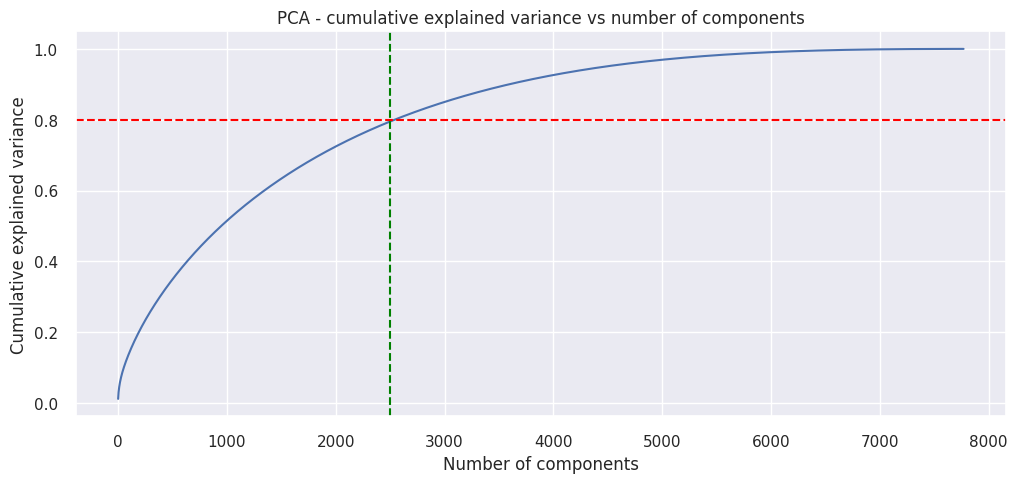

In [818]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [819]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [820]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 8. Data Splitting

Not Required

### 9. Handling Imbalanced Dataset

Not Required

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

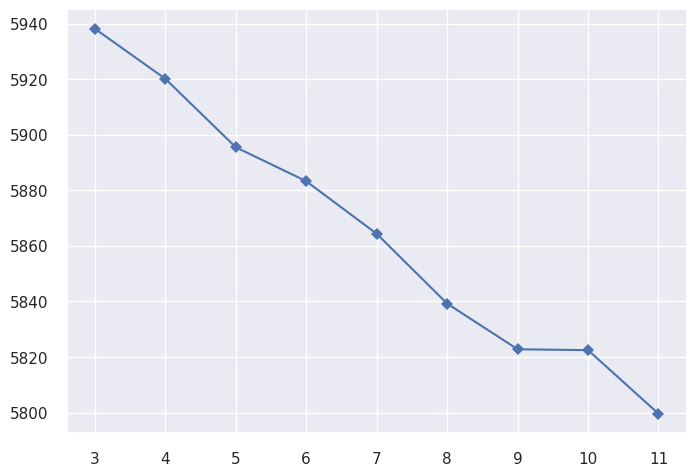

In [821]:
# ML Model - 1 Implementation

# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
Visualizer = KElbowVisualizer(model, k=(3,12) ,metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
Visualizer.fit(X)


From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [822]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [823]:

# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,new,K_mean_cluster
show_id,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,future elite inhabit island paradise far crowd...,5
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,devastating earthquake hits mexico city trappe...,3
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,army recruit found dead fellow soldiers forced...,3
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,postapocalyptic world ragdoll robots hide fear...,4
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,brilliant group students become cardcounting e...,4


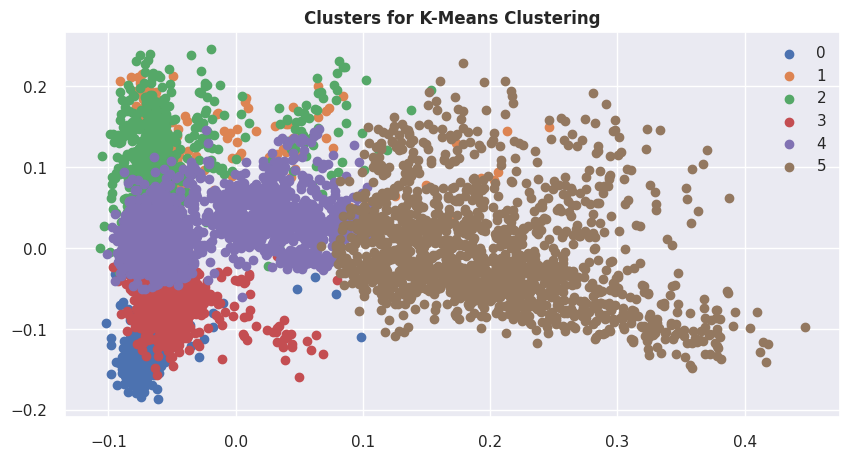

In [824]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering',weight = 'bold')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [825]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart


Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

You could pick K random data points and make those your starting points.

Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

The algorithm is said to have “converged” once there are no more changes.

These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [826]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules


##### Which hyperparameter optimization technique have you used and why?

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square). i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 Silhouette Score for Clustering

In [827]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2, 11):
    km = KMeans(n_clusters=n_clusters, init = 'k-means++',random_state=32)
    km.fit(X)
    cluster_labels = km.fit_predict(X)
    centers = km.cluster_centers_
    score = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {score:.4f}")

# Fit the Algorithm

# Predict on the model

For n_clusters = 2, The average silhouette_score is: 0.0078
For n_clusters = 3, The average silhouette_score is: 0.0100
For n_clusters = 4, The average silhouette_score is: 0.0066
For n_clusters = 5, The average silhouette_score is: 0.0064
For n_clusters = 6, The average silhouette_score is: 0.0085
For n_clusters = 7, The average silhouette_score is: 0.0102
For n_clusters = 8, The average silhouette_score is: 0.0099
For n_clusters = 9, The average silhouette_score is: 0.0103
For n_clusters = 10, The average silhouette_score is: 0.0109


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 10.

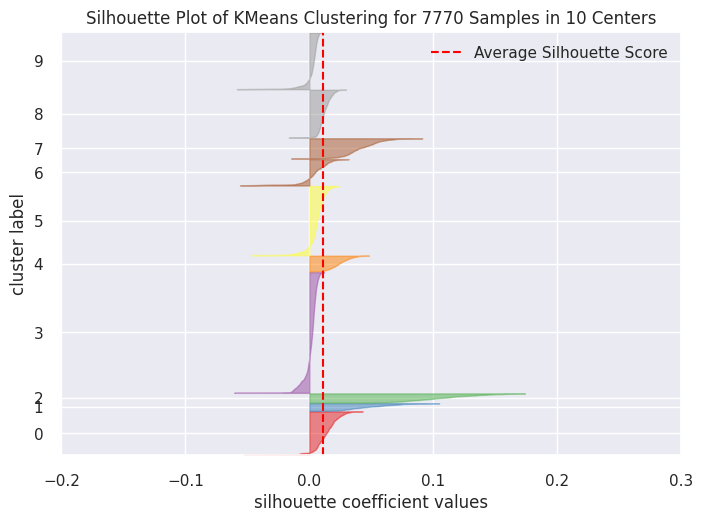

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7770 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [828]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
Visualizer = SilhouetteVisualizer(km)

# Fit the training data to the visualizer
Visualizer.fit(X)

Visualizer.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [829]:
# Visualizing evaluation Metric Score chart
# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [830]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph



##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 10 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.


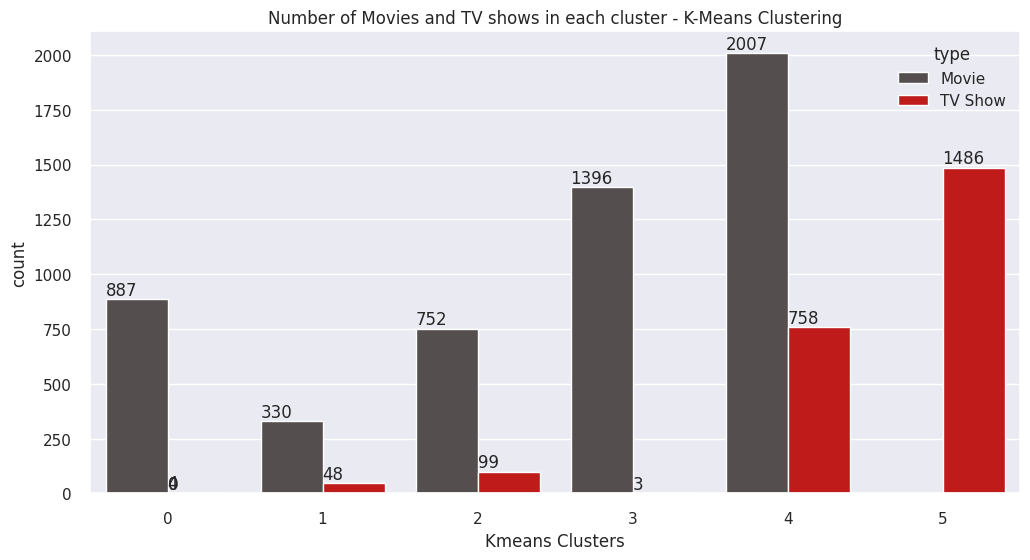

In [831]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=data, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')


## Cluster Analysis

Clustering similar content by matching text-based features

In [832]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features

def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in data[data['K_mean_cluster']==cluster_num].new.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', pad=20,weight = 'bold')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()


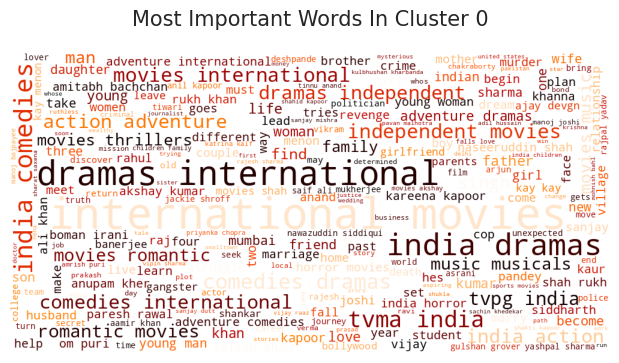

In [833]:
# WorldCup for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: drams, india, movies, international etc.**

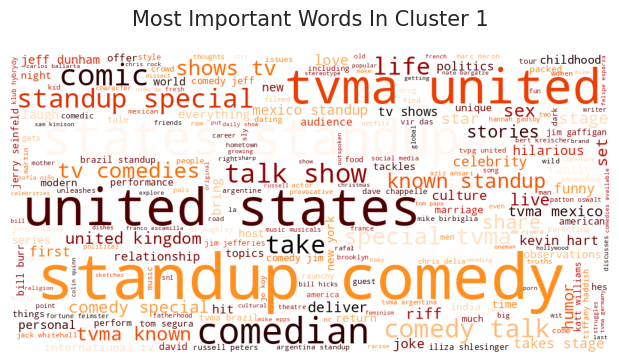

In [840]:
# WorldCup for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: united states, standup comedy, tvma , comedian etc.**

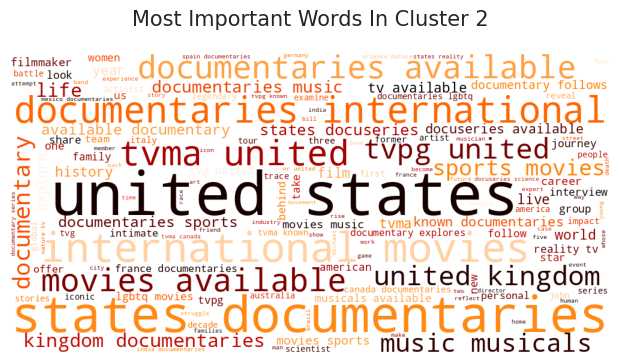

In [841]:
# WorldCup for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: united states, documentariesy, international , movies etc.**

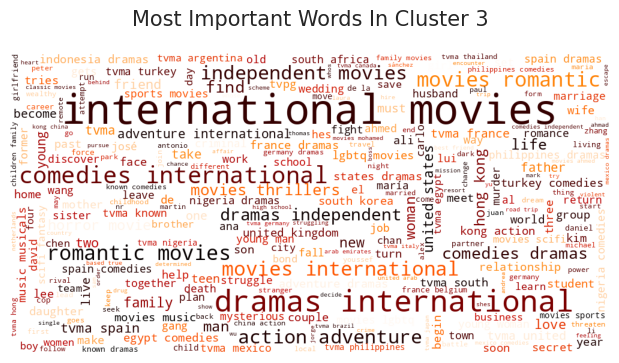

In [842]:
# WorldCup for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 1: internation moview, drams, comedies , romantic movies etc.**

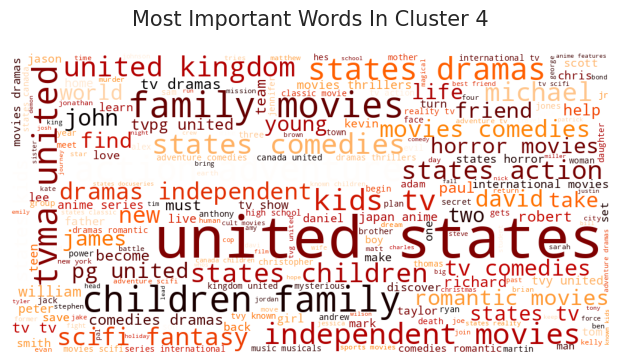

In [843]:
# WorldCup for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 1: united states, children, family, independent , movies etc.**

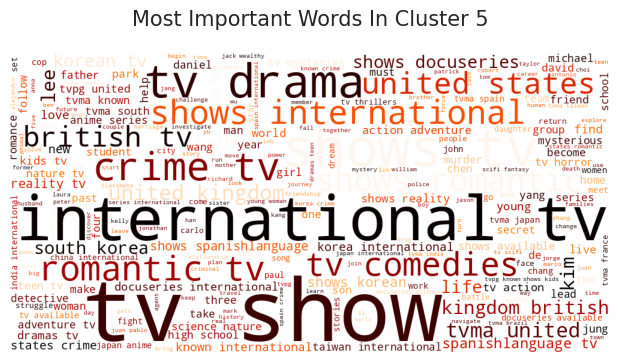

In [845]:
# WorldCup for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 1: tv show, international tv, romantic , shows international etc.**


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## **Content Based Recommender System**





In [834]:
# new dataframe for building a recommender system
recommender_df=data.copy()

# reset index
recommender_df.reset_index(inplace=True)

# drop show id column
recommender_df = recommender_df.drop('show_id', axis=1) # Specify axis=1 to drop a column
recommender_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,new,K_mean_cluster
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,future elite inhabit island paradise far crowd...,5
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,devastating earthquake hits mexico city trappe...,3
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,army recruit found dead fellow soldiers forced...,3
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,postapocalyptic world ragdoll robots hide fear...,4
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,brilliant group students become cardcounting e...,4


In [835]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [836]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [837]:
# Checking Recommender System on a Indian Movie
recommend('Kuch Kuch Hota Hai')

------------------------------------------------------------
Since you liked 'Kuch Kuch Hota Hai', you may also like:
------------------------------------------------------------
Kabhi Khushi Kabhie Gham
Hello Brother
Judwaa
Chalte Chalte
Hum Aapke Hain Koun
Paheli
Chaahat
Kya Kehna
Kal Ho Naa Ho
Kabhi Alvida Naa Kehna


In [ ]:
# Checking Recommender System on a Content Which is Not Listed in Netflix Dataset
recommend('Avatar')

Didn't find any matches for 'Avatar'. Browse other popular TV shows and movies.

In [859]:
# Checking Recommender System on a Hollywood science fiction movie
recommend('The Matrix')

------------------------------------------------------------
Since you liked 'The Matrix', you may also like:
------------------------------------------------------------
The Matrix Reloaded
The Matrix Revolutions
The Signal
Event Horizon
Singularity
Searching for Bobby Fischer
The Bad Batch
Arès
A Queen Is Born
The Lake House


In [861]:
# Testing Recommender System on a  TV Show
recommend('Mahabharat')

------------------------------------------------------------
Since you liked 'Mahabharat', you may also like:
------------------------------------------------------------
Satyagraha
TE3N
Yamla Pagla Deewana 2
Raajneeti
Romeo Akbar Walter
Guru
Naam Shabana
Aarakshan
Rivaaz
Yuva


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [863]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean, open('model.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [865]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickel_model = pickle.load(open('model.pkl', 'rb'))
pickel_model.predict(X)

array([5, 3, 3, ..., 2, 5, 2], dtype=int32)

In [866]:
y_kmean

array([5, 3, 3, ..., 2, 5, 2], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aimed to cluster TV shows and movies based on their similarities and differences, with the end goal of developing a content-based recommender system. The system suggests 10 shows to users based on their viewing history.

Here are some key takeaways from the project:

* The dataset contained 7,787 records and 12 attributes, requiring careful handling of missing values and a thorough exploratory data analysis (EDA).
* The analysis showed that Netflix has more movies than TV shows, with a growing collection of content from the United States.
* To cluster the content, I focused on six key attributes: director, cast, country, genre, rating, and description (all categorical variables).
* These attributes were transformed using TF-IDF vectorization, resulting in 9,000 features.
* To tackle the curse of dimensionality, I applied Principal Component Analysis (PCA), reducing the feature space to 2,500 components while retaining over 80% of the variance.
* I implemented the K-Means algorithm to cluster the shows. The elbow method suggested an optimal cluster count of 6, while the Silhouette score analysis indicated that 10 clusters provided better-defined groupings.
* Building on these efforts, I developed a content-based recommender system using a cosine similarity matrix to measure show similarities.

The recommender system delivers personalized recommendations by analyzing the user's viewing history, leveraging content similarities to suggest ten highly relevant shows for an enhanced viewing experience

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***